# Stoneburner, Kurt
- ## DSC 650 - Assignment 11 Generative Text Modeling
- Using LSTM to predict characters based on the works of Edgar Allen Poe


In [1]:
import os
import sys
# //*** Imports and Load Data
#import matplotlib.pyplot as plt
import numpy as np
#import pandas as pd


from pathlib import Path


#//*** Use the whole window in the IPYNB editor
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#//*** Maximize columns and rows displayed by pandas
#pd.set_option('display.max_rows', 100)
#pd.set_option('display.max_columns', None)

import email
from email.policy import default
from email.parser import Parser

   

from chardet.universaldetector import UniversalDetector
from bs4 import BeautifulSoup
    
#//*** Quiet the BS4 warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='bs4')

In [78]:
def parse_html_payload(payload):
    #from bs4 import BeautifulSoup
    
    #//*** Quiet the BS4 warnings
    #import warnings
    #warnings.filterwarnings("ignore", category=UserWarning, module='bs4')
    """
    This function uses Beautiful Soup to read HTML data
    and return the text.  If the payload is plain text, then
    Beautiful Soup will return the original content
    """
    soup = BeautifulSoup(payload, 'html.parser')
    #print(soup.find_all("p"))
    return str(soup.get_text()).encode('utf-8').decode('utf-8')
    #return soup
#//********************************************************
#//*** Plot a Fitted Models History of Loss and Accuracy
#//********************************************************
def plot_model_history(input_history):
    import matplotlib.pyplot as plt
    

    loss_key, acc_key = list(input_history['history'].keys())[:2]
    

    acc = input_history['history'][acc_key]
    loss = input_history['history'][loss_key]

    
    epochs = range(1, len(loss) + 1)
    plt.plot(epochs, acc, "b", label="Training Accuracy")
    plt.title("Training Accuracy\nAccuracy should go up")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

    plt.plot(epochs, loss, "bo", label="Training Loss")
    
    plt.title("Training Loss \nLoss should go down")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

    #//*** Quit if only accuracy and Loss
    if len(list(input_history['history'].keys())) == 2:
        return
    

    val_loss_key, val_acc_key = list(input_history.history.keys())[2:]
    
    val_loss = input_history.history[val_loss_key]
    val_acc = input_history.history[val_acc_key]

    plt.plot(epochs, loss, "bo", label="Training loss")
    plt.plot(epochs, val_loss, "b", label="Validation loss")
    plt.title("Training and validation loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()
    
    #//*** Plot the Validation Set Accuracy
    plt.clf()
    
    plt.plot(epochs, acc, "bo", label="Training accuracy")
    plt.plot(epochs, val_acc, "b", label="Validation accuracy")
    plt.title("Training and validation accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()
    

In [2]:
import ebooklib
from ebooklib import epub
from html.parser import HTMLParser

#book = epub.read_epub('./books/Moby-Dick-Herman-Melville.epub')


#book = epub.read_epub('./books/Moby-Dick-Herman-Melville.epub')
book = epub.read_epub('./books/pg25525.epub')

In [3]:
import tensorflow.compat.v1 as tf 
import tensorflow as tf 
#tf.enable_eager_execution(tf.ConfigProto(log_device_placement=True)) 

print(tf.add([1.0, 2.0], [3.0, 4.0])) 

tf.Tensor([4. 6.], shape=(2,), dtype=float32)


In [110]:
"""
Moby Dick Cleaning
raw_text = ""
for x in book.get_items():
    if x.get_type() == 9:
        raw_text += parse_html_payload(x.get_body_content())

#//*** Manually remove all text before chapter1 - This is the header plus a bunch of quotes
text = raw_text[raw_text.find("Chapter 1 Loomings"):]
"""
raw_text = ""
for x in book.get_items():
    if x.get_type() == 9:
        raw_text += parse_html_payload(x.get_body_content())


print("Length Before Cleaning: ", len(raw_text))
#//*******************
#//*** Light cleaning
#//*******************
#//*** Manually remove all text before the first original Poe Story
raw_text = raw_text[raw_text.find("THE UNPARALLELED ADVENTURES OF ONE HANS PFAAL")+1:]    

#//*** Find the end of his collected works, this will remove all the copyright notices and additional comments
end_dex = raw_text.find("NOTES\nOf the many verses from time to time ascribed to the pen of Edgar Poe")
raw_text = raw_text[raw_text.find("THE UNPARALLELED ADVENTURES OF ONE HANS PFAAL"):end_dex]


#//*** Remove \xa0 spacing characters
while "\xa0" in raw_text:
    raw_text = raw_text.replace("\xa0","")
print("Length After Cleaning: ", len(raw_text))

Length Before Cleaning:  2592579
Length After Cleaning:  2493812


In [ ]:
import random
import sys

def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)



## Build and Save an LSTM model and additional Parameters for reproduction ##
This is the final results after numerous model testing runs. Some these tests models have been preserved.

6
Number of sequences: 415626
Unique characters: 151
Vectorization...
(415626, 60, 151)
(415626, 151)
Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_54 (LSTM)               (None, 256)               417792    
_________________________________________________________________
dense_45 (Dense)             (None, 151)               38807     
Total params: 456,599
Trainable params: 456,599
Non-trainable params: 0
_________________________________________________________________
['iend.\nOINOS. But does not The Most High know all?\nAGATHOS. T', 'er from my thoughts—“Dammit,” I suggested—“the gentleman say', 'e “peculiar shape of that box”; and, as I spoke the words, I']
epoch 1
Epoch 1/5
3248/3248 [==============================] - 694s 213ms/step - loss: 2.2683 - accuracy: 0.3620
Epoch 2/5
3248/3248 [==============================] - 691s 213ms/step - loss: 1.8503 - accuracy: 0

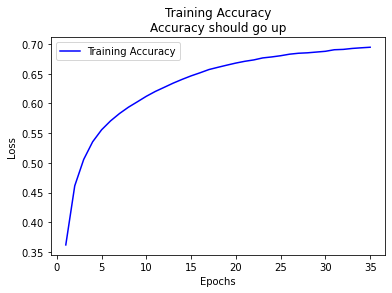

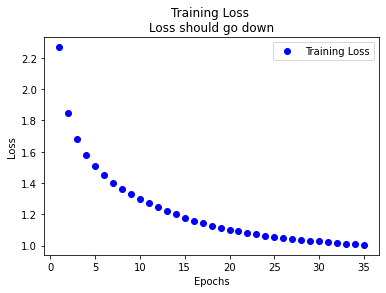

(5, '[ Once upon a midnight dreary, while I pondered, weak and wear ]th the strange of the strange of the strange of the strange of the strange of the strange of the strange of the strange ')
(10, '[ Once upon a midnight dreary, while I pondered, weak and wear ]s of the seven of the bottom of the seas of the seven of the bottom of the seas of the bottom of the seas of the seven o')
(15, '[ Once upon a midnight dreary, while I pondered, weak and wear ]s the personal ruby of the board and the thing, and the personal region of the constractic and the state of the manner o')
(20, '[ Once upon a midnight dreary, while I pondered, weak and wear ]s she said that I had been suppered the point of the surface of the cornsparatical and the sounds. I had not been attemp')
(25, '[ Once upon a midnight dreary, while I pondered, weak and wear ]s succeeded in the same time, the most intentions of the true, and the conscious of the corpse, the contiment of the thi')
(30, '[ Once upon a midnight dreary,

In [129]:
# Length of extracted character sequences
maxlen = 60

# We sample a new sequence every `step` characters
step = int(maxlen *.1)

if step <= 0:
    step=1

print(step)

pct = 1
tensor_count = 256
text = raw_text[:int(len(raw_text)*pct)]

# This holds our extracted sequences
sentences = []

# This holds the targets (the follow-up characters)
next_chars = []

for i in range(0, len(text) - maxlen, step):
    sentences.append(text[i: i + maxlen])
    next_chars.append(text[i + maxlen])
print('Number of sequences:', len(sentences))

# List of unique characters in the corpus
chars = sorted(list(set(text)))
print('Unique characters:', len(chars))
# Dictionary mapping unique characters to their index in `chars`
char_indices = dict((char, chars.index(char)) for char in chars)

# Next, one-hot encode the characters into binary arrays.
print('Vectorization...')
x = np.zeros((len(sentences), maxlen, len(chars)), dtype=np.bool)
y = np.zeros((len(sentences), len(chars)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1
    
print(x.shape)
print(y.shape)

from tensorflow import keras
from keras import layers

model = keras.models.Sequential()
model.add(layers.LSTM(tensor_count, input_shape=(maxlen, len(chars))))
#model.add(layers.Dropout(0.5))
#model.add(layers.LSTM(64))
model.add(layers.Dense(len(chars), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer="rmsprop",metrics=["accuracy"])
              
model.summary()

seeds  = []

for i in range(0,3):
    start_index = random.randint(0, len(text) - maxlen - 1)
    seeds.append(text[start_index: start_index + maxlen])
    
print(seeds)

import random
import sys
train = x
targets = y
history = {
    'loss' : [],
    'accuracy':[]
}

seed_text = "Once upon a midnight dreary, while I pondered, weak and weary,Over many a quaint and curious volume of forgotten lore— While I nodded, nearly napping, suddenly there came a tapping, As of some one gently rapping, rapping at my chamber door— 'Tis some visitor, I muttered, tapping at my chamber door— Only this and nothing more."



predictions = []
for epoch in range(1, 8):
    print('epoch', epoch)
    # Fit the model for 1 epoch on the available training data
    result = model.fit(train, targets,
              batch_size=128,
              epochs=5)

    # Select a text seed at random
    #start_index = random.randint(0, len(text) - maxlen - 1)
    #generated_text = text[start_index: start_index + maxlen]
    #print('--- Generating with seed: "' + generated_text + '"')
    
    history['loss'] = history['loss'] + result.history['loss'] 
    history['accuracy'] = history['accuracy'] + result.history['accuracy'] 
    


    

    generated_text = seed_text[:maxlen]
    predict = f"[ {generated_text} ]"
    
    # We generate 400 characters
    for i in range(120):
        sampled = np.zeros((1, maxlen, len(chars)))
        for t, char in enumerate(generated_text):
            sampled[0, t, char_indices[char]] = 1.

        preds = model.predict(sampled, verbose=0)[0]

        next_char = chars[np.argmax(preds)]

        predict += next_char

        generated_text += next_char
        generated_text = generated_text[1:]

        #sys.stdout.write(next_char)
        #sys.stdout.flush()
    print(predict)
    predictions.append((epoch*5,predict))

plot_model_history({"history":history})
for pred in predictions:
    print(pred)



import pickle

filename = f"./results/model_EdgarAllenPoe_Letters_PCT{pct*100}_ML{maxlen}_S{step}_TC{tensor_count}"

#//*** Save The Model
from keras.models import load_model
model.save(f"{filename}.h5")

#//*** Save dictionaries parameters and ngrams
pickle_collection = {

    "chars" : chars,
    
    "char_indices" : char_indices,
    
    "history" : {"history":history},

    "params" : {
        "max_len" : maxlen,
        "pct":pct,
        "step" : step,
        "tensor_count" : tensor_count
    },
    "predictions" : predictions,
}

with open(f"{filename}.pkl",'wb') as f:
    pickle.dump(pickle_collection, f)
    
#print(filename)
#print("Done")



## Examples of model prediction and accuracy curves ## 


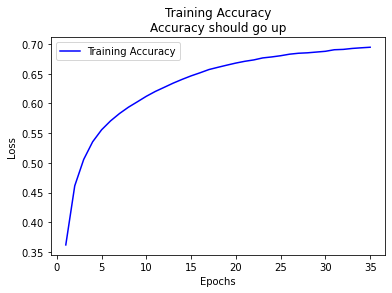

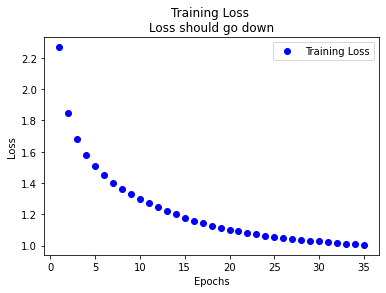

(5, '[ Once upon a midnight dreary, while I pondered, weak and wear ]th the strange of the strange of the strange of the strange of the strange of the strange of the strange of the strange ')
(10, '[ Once upon a midnight dreary, while I pondered, weak and wear ]s of the seven of the bottom of the seas of the seven of the bottom of the seas of the bottom of the seas of the seven o')
(15, '[ Once upon a midnight dreary, while I pondered, weak and wear ]s the personal ruby of the board and the thing, and the personal region of the constractic and the state of the manner o')
(20, '[ Once upon a midnight dreary, while I pondered, weak and wear ]s she said that I had been suppered the point of the surface of the cornsparatical and the sounds. I had not been attemp')
(25, '[ Once upon a midnight dreary, while I pondered, weak and wear ]s succeeded in the same time, the most intentions of the true, and the conscious of the corpse, the contiment of the thi')
(30, '[ Once upon a midnight dreary,

In [130]:
plot_model_history({"history":history})
for pred in predictions:
    print(pred)
    
    

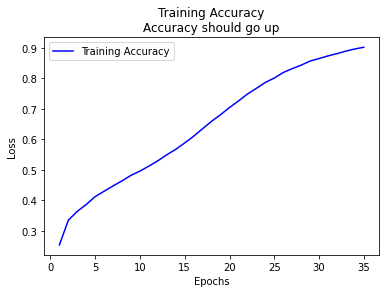

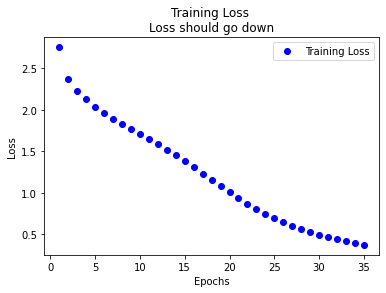

(5, '[ d the blather my sible to the latter in the eart. It was as  ] and the sound the sound the sound the sound the sound the sound the sound the sound the sound the sound the sound the s')
(10, '[ ound the sound the sound the sound the sound the sound the s ] be to the some of the contine of the some of the contine of the some of the contine of the some of the contine of the s')
(15, '[  the some of the contine of the some of the contine of the s ]d the disting of the contrines of the seames with with the reat of the seat with with the reat of the contined of the se')
(20, '[ eat of the seat with with the reat of the contined of the se ]d, in the dinstent, he passived the cranter pearress of the charr, and the sterning and some not a chulfer and dacaries ')
(25, '[ charr, and the sterning and some not a chulfer and dacaries  ]d. The supperers, whine in in a consing abreith in curition, which the assess that of menicain collusion that the eartic')
(30, '[  which the assess that of me

In [126]:
plot_model_history({"history":history})
for pred in predictions:
    print(pred)
    
    

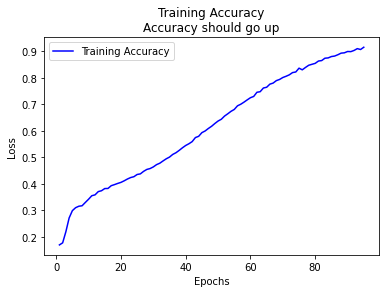

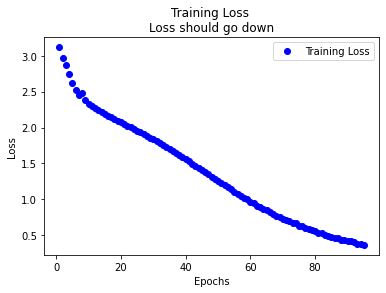

(5, '[  parallel of southern latitude, it turned off suddenly, at a ]ne the the the the the the the the the the the the the the the the the the the the the the the the the the the the the t')
(10, '[  parallel of southern latitude, it turned off suddenly, at a ]nd and and and and and and and and and and and and and and and and and and and and and and and and and and and and and a')
(15, '[  parallel of southern latitude, it turned off suddenly, at a ]nd and and and and and and and and and and and and and and and and and and and and and and and and and and and and and a')
(20, '[  parallel of southern latitude, it turned off suddenly, at a ]nd the the the the the the the the the the the the the the the the the the the the the the the the the the the the the t')
(25, '[  parallel of southern latitude, it turned off suddenly, at a ]nd and and and and and and and and and and and and and and and and and and and and and and and and and and and and and a')
(30, '[  parallel of southern latitu

In [114]:
plot_model_history({"history":history})
for pred in predictions:
    print(pred)
    
    

## Originial Deep Learning with Python Reference Code with Samples and Temperatures ## 

In [ ]:
def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

import random
import sys

for epoch in range(1,60):
    print('epoch', epoch)
    model.fit(train, targets, batch_size=128, epochs=1)

    start_index = random.randint(0, len(vectorizer.vocabulary_ngrams) - phrase_size - 1)

    generated_text = vectorizer.vocabulary_ngrams[start_index : start_index + phrase_size]


    for temperature in [0.2, 0.5, 1.0, 1.2]:
        print("----- temperature: ", temperature)
        predicted_words = []
        for i in range(60):
            sampled = np.zeros( (1, phrase_size,len(vectorizer.vocabulary_index.keys())) )

            for t, char in enumerate(generated_text):

                sampled[0, t, vectorizer.vocabulary_index[char]]

            preds = model.predict(sampled, verbose=0)[0]
            next_index = sample(preds, temperature)
            next_char = vectorizer.vocabulary_ngrams[next_index]

            generated_text.pop(0)
            generated_text.append(next_char)

            predicted_words.append(next_char)
        print(" ".join(predicted_words))
    

In [131]:

predictions

[(5,
  '[ Once upon a midnight dreary, while I pondered, weak and wear ]th the strange of the strange of the strange of the strange of the strange of the strange of the strange of the strange '),
 (10,
  '[ Once upon a midnight dreary, while I pondered, weak and wear ]s of the seven of the bottom of the seas of the seven of the bottom of the seas of the bottom of the seas of the seven o'),
 (15,
  '[ Once upon a midnight dreary, while I pondered, weak and wear ]s the personal ruby of the board and the thing, and the personal region of the constractic and the state of the manner o'),
 (20,
  '[ Once upon a midnight dreary, while I pondered, weak and wear ]s she said that I had been suppered the point of the surface of the cornsparatical and the sounds. I had not been attemp'),
 (25,
  '[ Once upon a midnight dreary, while I pondered, weak and wear ]s succeeded in the same time, the most intentions of the true, and the conscious of the corpse, the contiment of the thi'),
 (30,
  '[ Once 

In [132]:
#//*** Save dictionaries parameters and ngrams
pickle_collection = {

    "chars" : chars,
    
    "char_indices" : char_indices,
    
    "history" : {"history":history},

    "params" : {
        "max_len" : maxlen,
        "pct":pct,
        "step" : step,
        "tensor_count" : tensor_count
    },
    "predictions" : predictions,
}

with open(f"{filename}.pkl",'wb') as f:
    pickle.dump(pickle_collection, f)

In [134]:
filename

'./results/model_EdgarAllenPoe_Letters_PCT100_ML60_S6_TC256'